<a href="https://colab.research.google.com/github/krabhinandan/placement-data-analysis/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
placement_data = pd.read_csv("/content/drive/MyDrive/project python/Placement_Data.csv")

In [ ]:
placement_data.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


In [ ]:
feature_names = placement_data.columns.tolist()
print("Feature Names:")
print(feature_names)

Feature Names:
['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary']


In [ ]:
print("Total number of rows & columns, Rows={}, Columns={}".format(placement_data.shape[0],placement_data.shape[1]))

Total number of rows & columns, Rows=215, Columns=15


In [ ]:
placement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
placement_data.ssc_p.mean()
print("Average Secondary Education Percentage (10th Grade): {:.2f}%".format(placement_data.ssc_p.mean()))

Average Secondary Education Percentage (10th Grade): 67.30%


In [ ]:
placement_data.ssc_p.max()

89.4

In [ ]:
secondary_education_percentage_column = 'ssc_P'
max_secondary_percentage = placement_data.ssc_p.max()
num_toppers = placement_data[placement_data.ssc_p == max_secondary_percentage].shape[0]
print("Number of Toppers in 10th Grade: {}".format(num_toppers))

Number of Toppers in 10th Grade: 1


In [ ]:
secondary_education_percentage_column = 'ssc_p'
max_percentage_student = placement_data.loc[placement_data[secondary_education_percentage_column].idxmax()]
is_placed = max_percentage_student['status']
print("Student with the Highest Secondary Education Percentage:")
print("\nIs the student placed? {}".format(is_placed))

Student with the Highest Secondary Education Percentage:

Is the student placed? Placed


In [ ]:
num_placed = placement_data[placement_data.status == 'Placed'].shape[0]
num_unplaced = placement_data[placement_data.status == 'Not Placed'].shape[0]
print("Number of Students Placed: {}".format(num_placed))
print("Number of Students Unplaced: {}".format(num_unplaced))

Number of Students Placed: 148
Number of Students Unplaced: 67


In [ ]:
placement_data.degree_t.nunique()

3

In [ ]:
placement_data.ssc_p.corr(placement_data.hsc_p)
print("Correlation between 10th and 12th Percentage: {:.2f}".format(placement_data.ssc_p.corr(placement_data.hsc_p)))

Correlation between 10th and 12th Percentage: 0.51


In [ ]:
print("Correlation Matrix:")
placement_data.corr()

Correlation Matrix:


<ipython-input-13-59f74125c4fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  placement_data.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [ ]:
placement_data.var()

<ipython-input-14-ae8a56e38e64>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  placement_data.var()


sl_no       3.870000e+03
ssc_p       1.172284e+02
hsc_p       1.187557e+02
degree_p    5.415110e+01
etest_p     1.762510e+02
mba_p       3.402838e+01
salary      8.734295e+09
dtype: float64

In [ ]:
df = placement_data.drop('etest_p', axis=1)

In [ ]:
print("Number of Null Values in Each Column:")
placement_data.isnull().sum()

Number of Null Values in Each Column:


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
print("Number of Null Values in Each Column After Filling:")
placement_data.fillna(0).isnull().sum()

Number of Null Values in Each Column After Filling:


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

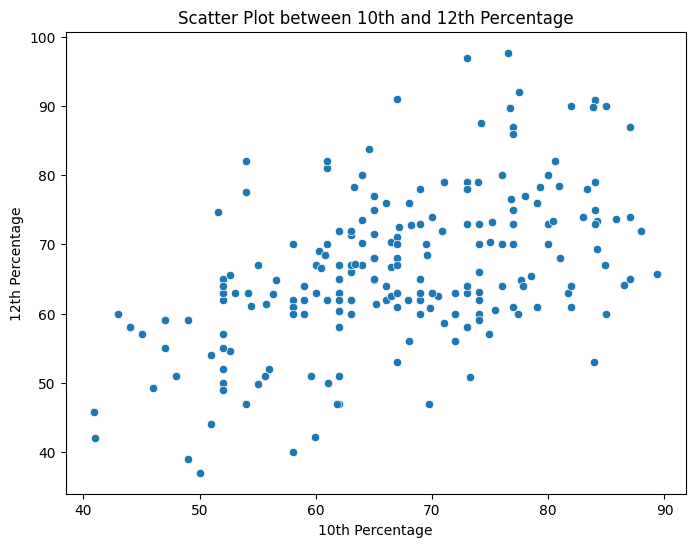

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=placement_data.ssc_p, y=placement_data.hsc_p)
plt.title('Scatter Plot between 10th and 12th Percentage')
plt.xlabel('10th Percentage')
plt.ylabel('12th Percentage')
plt.show()

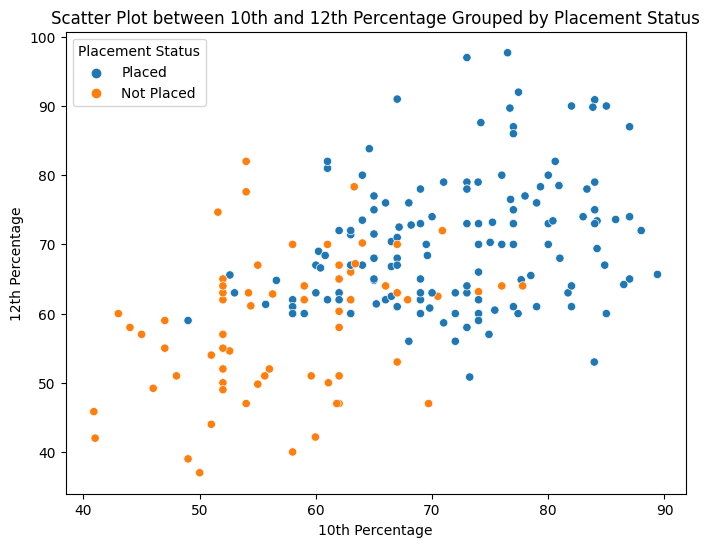

In [ ]:
tenth_percentage_column = 'ssc_p'
twelfth_percentage_column = 'hsc_p'
placement_status_column = 'status'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tenth_percentage_column, y=twelfth_percentage_column, hue=placement_status_column, data=placement_data)
plt.title('Scatter Plot between 10th and 12th Percentage Grouped by Placement Status')
plt.xlabel('10th Percentage')
plt.ylabel('12th Percentage')
plt.legend(title='Placement Status')
plt.show()

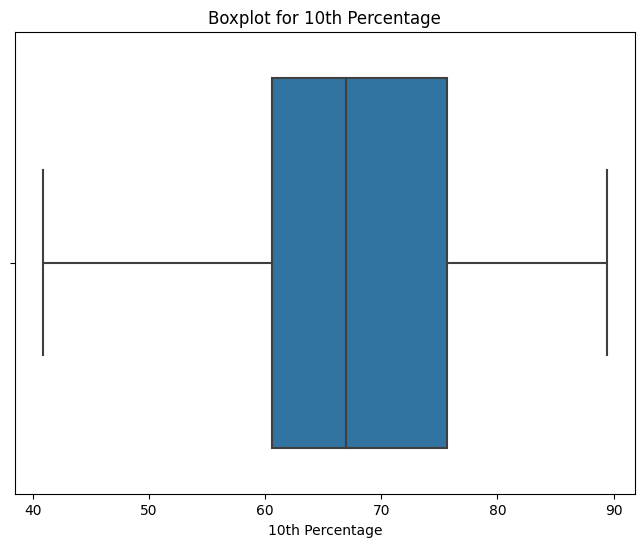

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=placement_data.ssc_p)
plt.title('Boxplot for 10th Percentage')
plt.xlabel('10th Percentage')
plt.show()

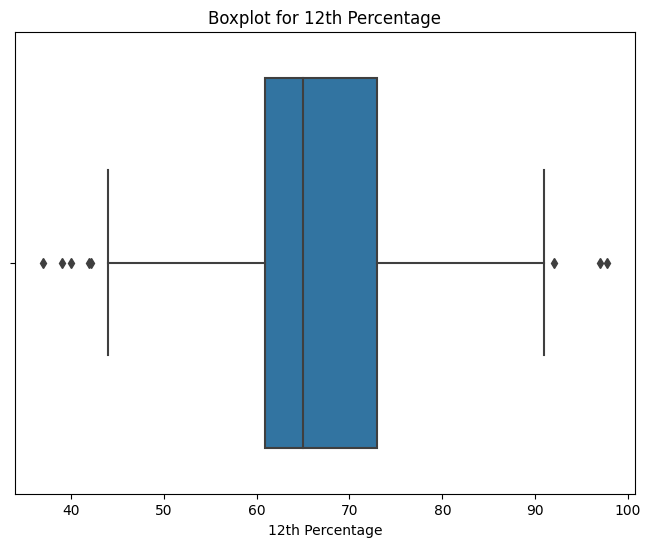

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=placement_data.hsc_p)
plt.title('Boxplot for 12th Percentage')
plt.xlabel('12th Percentage')
plt.show()

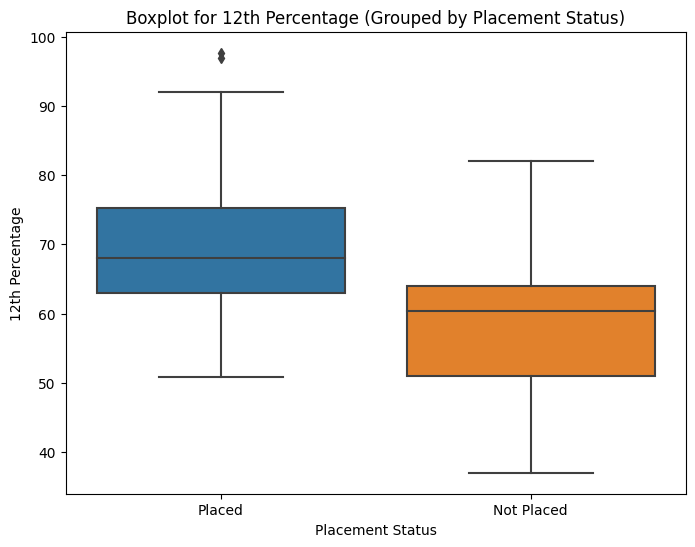

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=placement_data.status, y=placement_data.hsc_p)
plt.title('Boxplot for 12th Percentage (Grouped by Placement Status)')
plt.xlabel('Placement Status')
plt.ylabel('12th Percentage')
plt.show()

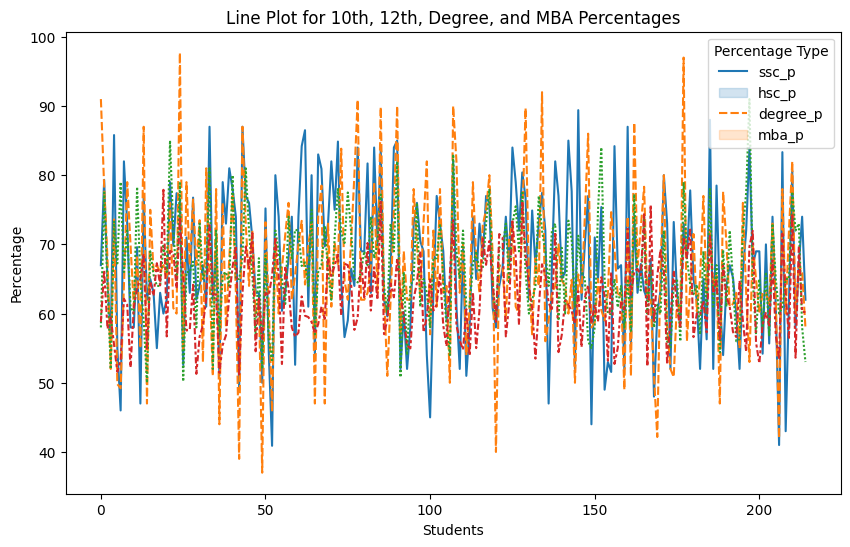

In [ ]:
plt.figure(figsize=(10, 6))
percentages_columns = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']
sns.lineplot(data=placement_data[percentages_columns])
plt.title('Line Plot for 10th, 12th, Degree, and MBA Percentages')
plt.xlabel('Students')
plt.ylabel('Percentage')
plt.legend(title='Percentage Type', labels=percentages_columns)
plt.show()

In [ ]:
placement_data.select_dtypes(include='number').corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


<Axes: >

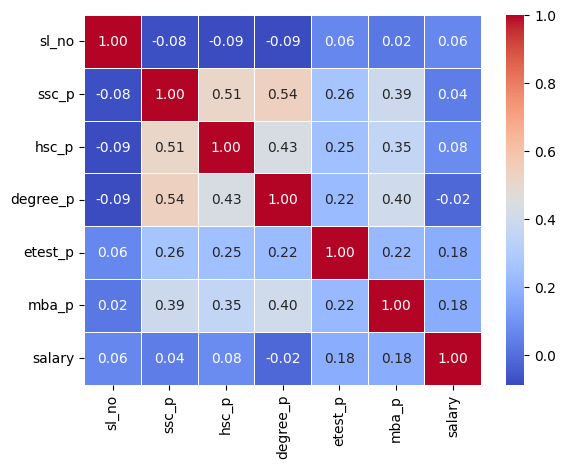

In [ ]:
sns.heatmap(placement_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)